# Optimal Desired Retention

## Minimum Workload

  0%|          | 0/8 [00:00<?, ?it/s]

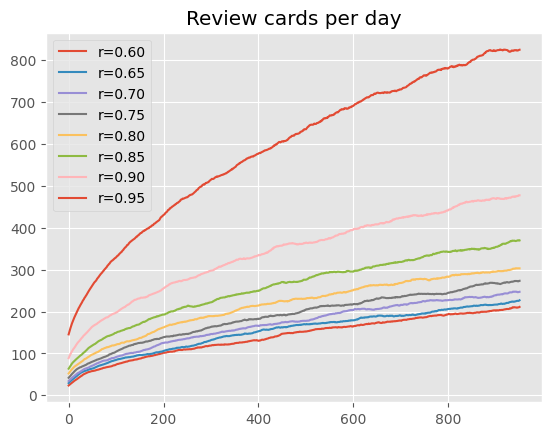

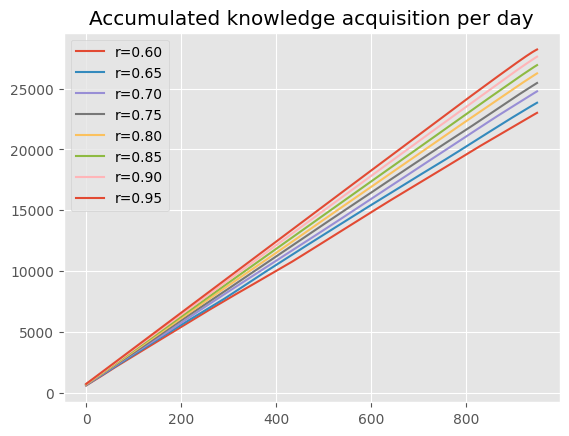

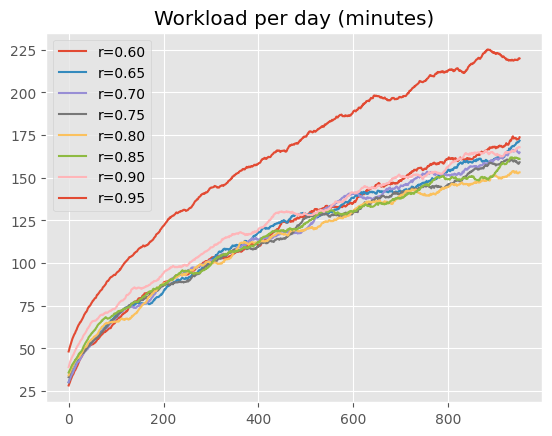

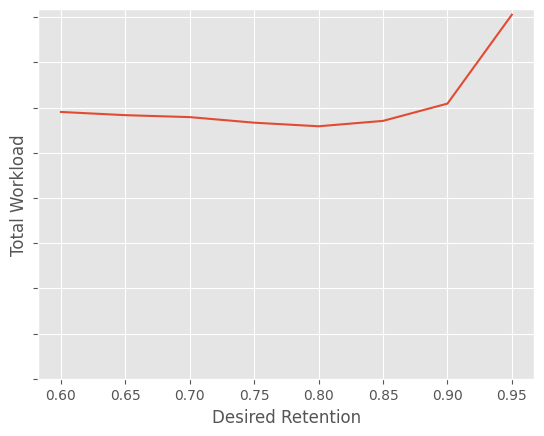

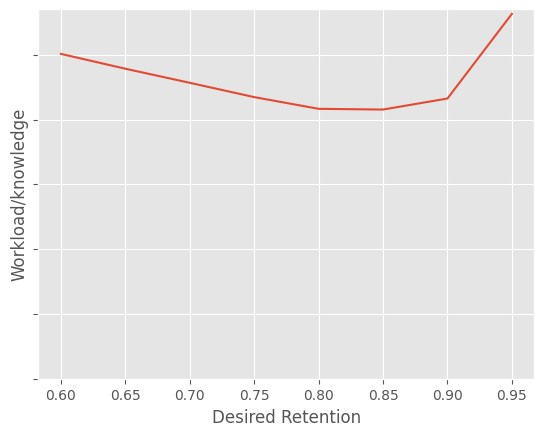

In [1]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from fsrs_optimizer import simulate, DEFAULT_WEIGHT

learn_span = 1000
new_card_per_day = 30

plt.style.use('ggplot')


def moving_average(data, window_size=learn_span // 20):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode="valid")


total_cost = []
cost_per_memorized = []

for r in tqdm(np.linspace(0.6, 0.95, 8)):
    random.seed(42)
    np.random.seed(42)
    (_, review_cnt_per_day, learn_cnt_per_day, memorized_cnt_per_day, cost_per_day) = simulate(
        DEFAULT_WEIGHT,
        request_retention=r,
        deck_size=learn_span*new_card_per_day,
        learn_span=learn_span,
        max_cost_perday=math.inf,
        learn_limit_perday=new_card_per_day,
        forget_cost=100,
    )
    cost_per_day /= 60
    plt.figure(1)
    plt.plot(moving_average(review_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(2)
    plt.plot(moving_average(memorized_cnt_per_day), label=f'r={r:.2f}')
    plt.figure(3)
    plt.plot(moving_average(cost_per_day), label=f'r={r:.2f}')
    total_cost.append(sum(cost_per_day))
    cost_per_memorized.append(sum(cost_per_day) / memorized_cnt_per_day[-1])

plt.figure(1)
plt.legend()
plt.title('Review cards per day')
plt.figure(2)
plt.legend()
plt.title('Accumulated knowledge acquisition per day')
plt.figure(3)
plt.legend()
plt.title('Workload per day (minutes)')
plt.figure(4)
plt.plot(np.linspace(0.6, 0.95, 8), total_cost)
plt.xlabel('Desired Retention')
plt.ylabel('Total Workload')
plt.ylim(bottom=0)
plt.tick_params(labelleft=False)
plt.figure(5)
plt.plot(np.linspace(0.6, 0.95, 8), cost_per_memorized)
plt.xlabel('Desired Retention')
plt.ylabel('Workload/knowledge')
plt.ylim(bottom=0)
plt.tick_params(labelleft=False)
plt.show()

## Maximum Knowledge Acquisition

  0%|          | 0/8 [00:00<?, ?it/s]

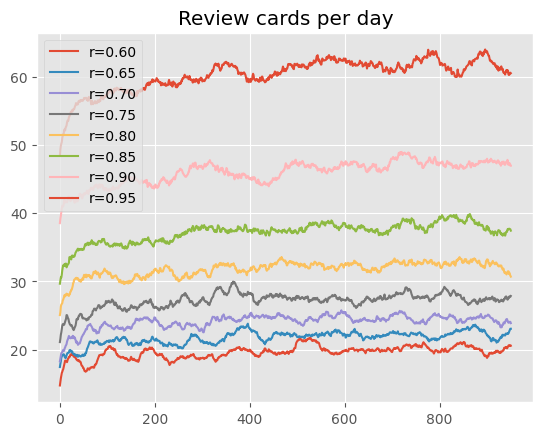

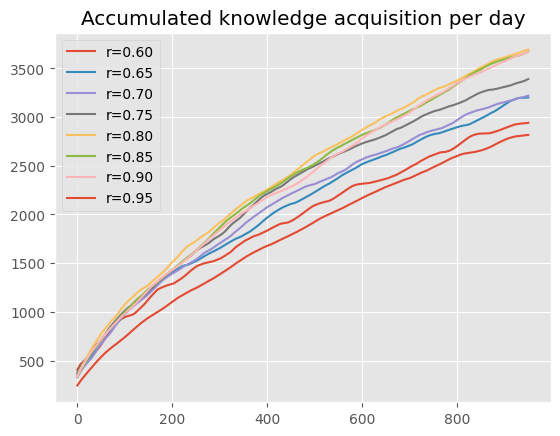

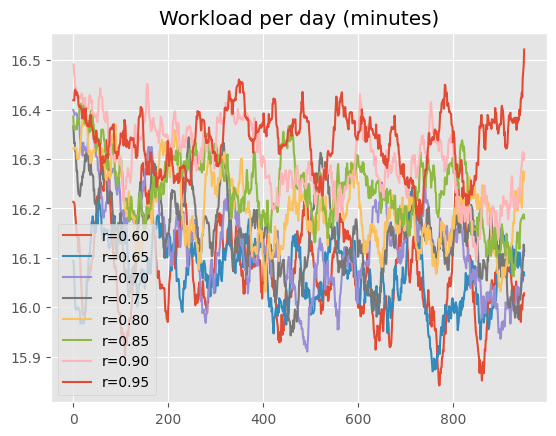

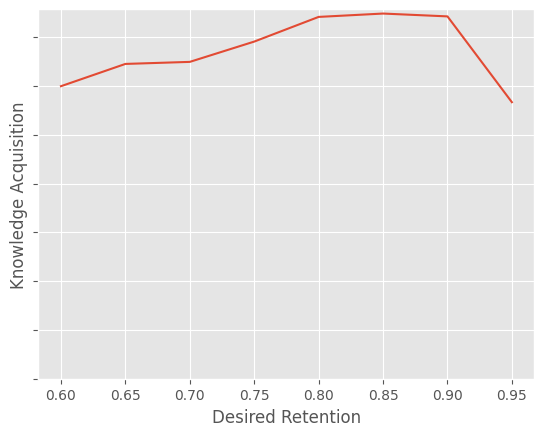

In [2]:
max_cost_perday = 1000

memorization = []

for r in tqdm(np.linspace(0.6, 0.95, 8)):
    random.seed(42)
    np.random.seed(42)
    (_, review_cnt_per_day, learn_cnt_per_day, memorized_cnt_per_day, cost_per_day) = (
        simulate(
            DEFAULT_WEIGHT,
            request_retention=r,
            deck_size=36500,
            learn_span=learn_span,
            max_cost_perday=max_cost_perday,
            forget_cost=100,
        )
    )
    cost_per_day /= 60
    plt.figure(1)
    plt.plot(moving_average(review_cnt_per_day), label=f"r={r:.2f}")
    plt.figure(2)
    plt.plot(moving_average(memorized_cnt_per_day), label=f"r={r:.2f}")
    plt.figure(3)
    plt.plot(moving_average(cost_per_day), label=f"r={r:.2f}")
    memorization.append(memorized_cnt_per_day[-1])

plt.figure(1)
plt.legend()
plt.title("Review cards per day")
plt.figure(2)
plt.legend()
plt.title("Accumulated knowledge acquisition per day")
plt.figure(3)
plt.legend()
plt.title("Workload per day (minutes)")
plt.figure(4)
plt.plot(np.linspace(0.6, 0.95, 8), memorization)
plt.xlabel("Desired Retention")
plt.ylabel("Knowledge Acquisition")
plt.ylim(bottom=0)
plt.tick_params(labelleft=False)
plt.show()